In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
#import seaborn as sns
import xlsxwriter
import scipy.stats as stats
import os,sys
import pickle
import random
import math
import time
import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon, Rectangle
from collections import OrderedDict
import pandas as pd
import shapefile as shp
import geopandas as gpd
from matplotlib.colors import rgb2hex, Normalize
from matplotlib.colorbar import ColorbarBase
from matplotlib.cm import ScalarMappable
import seaborn as sns

In [2]:
"""
Analysis is a modifition of main pipeline commenting parts of file read_lur
"""
SA_key = "SA_regional"

In [17]:
"""

"""
def get_pvalue_sign(x):
    x = float(x)
    if x<=0.01:
        return pvalue_lookup.get("0.01")
    elif x<=0.05:
         return pvalue_lookup.get("0.01")
    elif x<=0.1:
         return pvalue_lookup.get("0.1")
    else:
        return ""
        

pvalue_lookup = {
    "0.01": "***", 
    "0.05": "**",
    "0.1": "*" 
}

measurement_types = ['no2']
data = []
for measurement_type in measurement_types:
    for ac_type in ['AC', 'AC_5', 'AC_95']:
        fname = "../output_files/{}_results_{}_{}_pvalue.csv".format(SA_key, measurement_type, ac_type)
        df = pd.read_csv(fname)
        a1 = df.loc[df['term'] == 'ev_sales', 'estimate'].item()
#         s1 = df.loc[df['term'] == 'ev_sales', 'std.error'].item()
        p1 = df.loc[df['term'] == 'ev_sales', 'p.value'].item()
        
#         a2 = df.loc[df['term'] == 'nonev_sales', 'estimate'].item()
# # #         s2 = df.loc[df['term'] == 'nonev_sales', 'std.error'].item()
#         p2 = df.loc[df['term'] == 'nonev_sales', 'p.value'].item()
        print(round(1/a1), get_pvalue_sign(p1))
#         print(round(1/a2), get_pvalue_sign(p2))

11 ***
25 ***
9 ***


In [4]:
def get_pvalue_sign(x):
    x = float(x)
    if x<=0.01:
        return pvalue_lookup.get("0.01")
    elif x<=0.05:
         return pvalue_lookup.get("0.01")
    elif x<=0.1:
         return pvalue_lookup.get("0.1")
    else:
        return ""
        

pvalue_lookup = {
    "0.01": "***", 
    "0.05": "**",
    "0.1": "*" 
}

measurement_types = ['no2']
data = []
for measurement_type in measurement_types:
    for ac_type in ['AC', 'AC_5', 'AC_95']:
        fname = "../output_files/results_{}_{}_pvalue.csv".format(measurement_type, ac_type)
        df = pd.read_csv(fname)
        a1 = df.loc[df['term'] == 'ev_sales', 'estimate'].item()
#         s1 = df.loc[df['term'] == 'ev_sales', 'std.error'].item()
        p1 = df.loc[df['term'] == 'ev_sales', 'p.value'].item()
        
        a2 = df.loc[df['term'] == 'nonev_sales', 'estimate'].item()
# #         s2 = df.loc[df['term'] == 'nonev_sales', 'std.error'].item()
        p2 = df.loc[df['term'] == 'nonev_sales', 'p.value'].item()
        print(1/a1, get_pvalue_sign(p1))
        print(round(1/a2), get_pvalue_sign(p2))

-13.856529592990986 ***
322 ***
-28.864852412770933 ***
740 ***
-11.078155104491648 *
243 ***


In [9]:
measurement_types = ['no2']
data = []
for measurement_type in measurement_types:
    for ac_type in ['AC', 'AC_5', 'AC_95']:
        fname = "../output_files/{}_results_{}_{}_pvalue.csv".format(SA_key, measurement_type, ac_type)
        df = pd.read_csv(fname)
        a1 = df.loc[df['term'] == 'ev_sales', 'estimate'].item()
#         a2 = df.loc[df['term'] == 'nonev_sales', 'estimate'].item()
        data.append({
            "measurement_type": measurement_type,
            "ac_type": ac_type,
            "ev_sales": 1/a1,
            "nonev_sales": 1/a2
        })
    
mdf = pd.DataFrame(columns=['measurement_type', 'ac_type', 'ev_sales', 'nonev_sales'], data=data)


In [10]:
mdf

,measurement_type,ac_type,ev_sales,nonev_sales
0,no2,AC,NaN,126.385940
1,no2,AC_5,NaN,276.612198
2,no2,AC_95,NaN,98.005594


In [5]:
import statistics
from math import sqrt


def plot_confidence_interval(x, values, z=1.96, color='#2187bb', horizontal_line_width=0.25, label=None, point_color='r',
                            alpha=0.7):
    mean = values[0]

    left = x - horizontal_line_width / 2
    top = max(values)
    right = x + horizontal_line_width / 2
    bottom = min(values)
    plt.plot([x, x], [top, bottom], color=color, alpha=alpha)
    plt.plot([left, right], [top, top], color=color, alpha=alpha)
    plt.plot([left, right], [bottom, bottom], color=color, alpha=alpha)
    plt.plot(x-0.0055, mean, 'o', color=point_color, label=label)

    return mean

def plot_confidence_interval_v2(x, values, z=1.96, color='#2187bb', horizontal_line_width=0.25, label=None, point_color='r',
                            alpha=0.7):
    mean = values[0]

    left = x - horizontal_line_width / 2
    top = max(values)
    right = x + horizontal_line_width / 2
    bottom = min(values)
    plt.barh(x, mean*-1, color=color, alpha=alpha, label=label, height=0.5)
    ax = plt.gca()
    ax.arrow(0,x,(mean)*-1,0,color=color,length_includes_head=True,lw=0,head_width=0, 
    head_length=0, width=0.3, fc=color,ec=color)
#     ax.annotate(txt, xy=(i, y-dy/6),fontsize=18,horizontalalignment='center',verticalalignment= 'center')
    plt.xlim(-320, 30)

    return mean

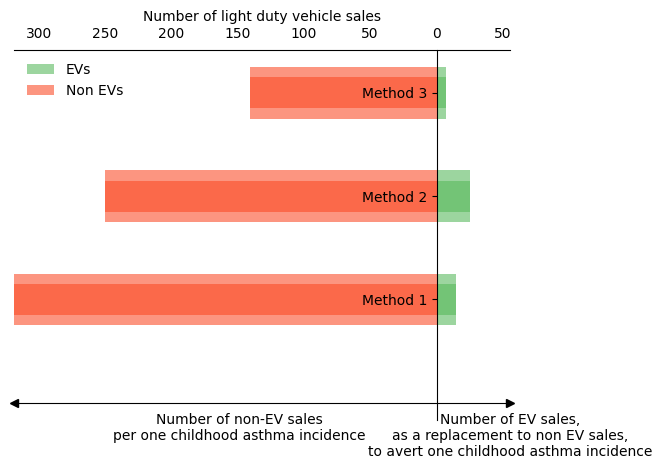

In [675]:
def call_for_ax(ax):
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    # hide one of the zero labels and adjust the other
    ax.yaxis.get_major_ticks()[3].label1.set_visible(False)
    ax.xaxis.get_major_ticks()[3].label1.set_horizontalalignment("right")

    ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
    ax.plot(0, 0, "<k", transform=ax.get_yaxis_transform(), clip_on=False)
    return ax


from mpl_toolkits.axisartist.axislines import AxesZero

sns.reset_defaults()

ev_cmap = plt.get_cmap("Greens")
nonev_cmap = plt.get_cmap("Reds")

for index, measurement_type in enumerate(measurement_types):
    x1 = index
    x2 = index
    y1 = mdf[mdf['measurement_type'] == measurement_type]['ev_sales'].tolist()
    y2 = mdf[mdf['measurement_type'] == measurement_type]['nonev_sales'].tolist()
    label1 = "EVs" if index == 0 else None
    label2 = "Non EVs" if index == 0 else None

    plot_confidence_interval_v2(x1+1, y1, color=ev_cmap(0.5), label=label1, point_color=ev_cmap(0.7))
    plot_confidence_interval_v2(x2+1, y2, color=nonev_cmap(0.5), label=label2, point_color=nonev_cmap(0.7))

ax = plt.gca()
ax2 = ax.secondary_xaxis('top', functions=(lambda x: x+1, lambda x: x+1))
ax = call_for_ax(ax)
ax.xaxis.set_ticks_position('none') 
ax2.set_xlabel("Number of light duty vehicle sales")
ax2.set_xticks([-300, -250, -200, -150, -100, -50, 0, 50], [300,250,200, 150, 100, 50, 0, 50])
ax2.xaxis.set_ticks_position('none') 


plt.yticks([1, 2, 3], ["Method 1", "Method 2", "Method 3"])
legend_one = "Number of non-EV sales\nper one childhood asthma incidence"
legend_two = "Number of EV sales,\nas a replacement to non EV sales,\nto avert one childhood asthma incidence"
plt.xticks([-150, 0, 55], [legend_one, "", legend_two])
plt.legend(loc='upper left', frameon=False)
# plt.savefig("output_images/final_figure_v2.png", bbox_inches='tight')
plt.show()

In [17]:
measurement_types = ['no2']
data = []
for measurement_type in measurement_types:
    for ac_type in ['AC', 'AC_5', 'AC_95']:
        fname = "../output_files/{}_results_{}_{}_pvalue.csv".format(SA_key, measurement_type, ac_type)
        df = pd.read_csv(fname)
#         a1 = df.loc[df['term'] == 'ev_sales', 'estimate'].item()
#         s1 = df.loc[df['term'] == 'ev_sales', 'std.error'].item()
#         p1 = df.loc[df['term'] == 'ev_sales', 'p.value'].item()
        
        a2 = df.loc[df['term'] == 'nonev_sales', 'estimate'].item()
        s2 = df.loc[df['term'] == 'nonev_sales', 'std.error'].item()
        p2 = df.loc[df['term'] == 'nonev_sales', 'p.value'].item()

        data.append({
            "measurement_type": measurement_type,
            "ac_type": ac_type,
#             "ev_sales": a1,
            "nonev_sales": a2,
#             "s1": s1,
            "s2": s2,
#             "p1": p1,
            "p2": p2
        })


126.38593956427707 1.6452608855784199e-18 ***
276.61219794829526 2.5694097292172097e-18 ***
98.00559368721422 1.22525544176652e-18 ***


In [678]:
def th(x):
    return "{:.2}".format(x)

def ee(x):
    return round(1/x)

wrapper = {}
for d in data:
    proxy = d.get("measurement_type")
    if proxy not in wrapper:
        wrapper[proxy] = {}
    if 'evintercept' not in wrapper[proxy] and d.get('ac_type') == 'AC':
        wrapper[proxy]['evintercept'] = ee(d.get("ev_sales"))
        wrapper[proxy]['nonevintercept'] = ee(d.get("nonev_sales"))
    if 'evstd' not in wrapper[proxy] and d.get('ac_type') == 'AC':
        wrapper[proxy]['evstd'] = th(d.get("s1"))
        wrapper[proxy]['nonstd'] = th(d.get("s2"))
    if 'evpvalue' not in wrapper[proxy] and d.get('ac_type') == 'AC':
        wrapper[proxy]['evpvalue'] = th(d.get("p1"))
        wrapper[proxy]['nonpvalue'] = th(d.get("p2"))
    if d.get('ac_type') in ['AC_5', 'AC_95']:
        if 'evci' not in wrapper[proxy]:
            wrapper[proxy]['evci'] = []
            wrapper[proxy]['nonevci'] = []
        wrapper[proxy]['evci'].append(ee(d.get("ev_sales")))
        wrapper[proxy]['nonevci'].append(ee(d.get("nonev_sales")))


In [729]:

index = 1
row=[]
for mtype, d in wrapper.items():
    ev_p_sign = get_pvalue_sign(d.get("evpvalue"))
    nonev_p_sign = get_pvalue_sign(d.get("nonpvalue"))
    ev_sale_value = "{} ({} - {}){}".format(d.get("evintercept"), d.get("evci")[0], d.get("evci")[1], ev_p_sign)
    nonev_sale_value = "{} ({} - {}){}".format(d.get("nonevintercept"), d.get("nonevci")[1], d.get("nonevci")[0], nonev_p_sign)

    row.append(["Method {}".format(index), mtype.upper(), ev_sale_value, nonev_sale_value]) 
    
    index+=1
row.append(["***, **, and * shows the significance at 10%, 5%, and 1%."])
national_inc = ["7"]
columns = ["Method", "Proxy to TRAP", "EV sales",  "non-EV sales"]
mdf = pd.DataFrame(columns=columns, data=row)

0.042
8.7e-15
0.32
1.2e-18
0.042
2.1e-23


In [730]:
mdf.to_csv("output_files/Table_1_v2.csv", index=False)

In [731]:
mdf

,Method,Proxy to TRAP,EV sales,non-EV sales
0,Method 1,NO2,-14 (-29 - -11)***,322 (243 - 740)***
1,Method 2,PM2.5,-24 (-64 - -17),252 (165 - 687)***
2,Method 3,PM10,-7 (-13 - -5)***,142 (103 - 302)***
3,"***, **, and * shows the significance at 10%, ...",None,None,None


In [670]:
#     row.append([index, mtype, "intercept", d.get("evintercept"), d.get("nonevintercept")])
#     row.append( [index, mtype, "interval", "({}, {})".format() ,  "({}, {})".format(*d.get("nonevci"))])
#     row.append([index, mtype, "std error", d.get("evstd"), d.get("nonstd")])
#     row.append([index, mtype, "p value", d.get("evpvalue"), d.get("nonpvalue")])

{'no2': {'evintercept': -14,
  'nonevintercept': 322,
  'evstd': '0.035',
  'nonstd': '0.00038',
  'evpvalue': '0.042',
  'nonpvalue': '8.7e-15',
  'evci': [-24, -16],
  'nonevci': [188, 77]},
 'pm2.5': {'evintercept': -24,
  'nonevintercept': 252,
  'evstd': '0.041',
  'nonstd': '0.00042',
  'evpvalue': '0.32',
  'nonpvalue': '1.2e-18',
  'evci': [149, 24],
  'nonevci': [227, 69]},
 'pm10': {'evintercept': -7,
  'nonevintercept': 142,
  'evstd': '0.075',
  'nonstd': '0.00064',
  'evpvalue': '0.042',
  'nonpvalue': '2.1e-23',
  'evci': [-60, 43],
  'nonevci': [150, 61]}}

In [388]:
tdf = pd.read_csv("output_files/model_AC_2013_2019_no2.csv")
col = 'AC'

In [158]:
tdf

,State,FCEV Sales,FCEV Market Share,BEV Sales,BEV Market Share,PHEV Sales,PHEV Market Share,year,State Name,state_code,...,incidence_cases,AC,AC_5,AC_95,IR,SAF,SAF_5,SAF_95,nonev_market_share,year_fixed
0,Alabama,0,0.0,77,0.0004,99,0.0005,2013,Alabama,1,...,8230.162553,869.224824,367.615729,1174.248160,0.008370,0.105615,0.044667,0.142676,0.999111,3
1,Arizona,0,0.0,705,0.0023,544,0.0017,2013,Arizona,4,...,12078.640683,3642.148404,1672.224665,4679.067603,0.008370,0.301536,0.138445,0.387384,0.996097,3
2,Arkansas,0,0.0,24,0.0002,74,0.0006,2013,Arkansas,5,...,5385.399750,583.547422,246.000274,789.801812,0.008370,0.108357,0.045679,0.146656,0.999205,3
3,Colorado,0,0.0,799,0.0035,635,0.0028,2013,Colorado,8,...,9422.353012,2015.605004,893.202094,2646.798878,0.008370,0.213917,0.094796,0.280906,0.993718,3
4,Connecticut,0,0.0,400,0.0025,718,0.0044,2013,Connecticut,9,...,2584.233496,535.250544,234.000903,708.134438,0.003661,0.207122,0.090549,0.274021,0.993149,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,Texas,0,0.0,3460,0.0028,2320,0.0019,2019,Texas,48,...,34410.475766,3513.129931,1517.380935,4682.678324,0.004990,0.102095,0.044096,0.136083,0.995323,9
278,Utah,0,0.0,2327,0.0142,702,0.0043,2019,Utah,49,...,3265.138530,637.395901,283.923443,834.129822,0.003719,0.195213,0.086956,0.255465,0.981516,9
279,Virginia,0,0.0,5677,0.0153,1337,0.0036,2019,Virginia,51,...,10675.526046,794.401487,348.053154,1050.019132,0.006190,0.074413,0.032603,0.098358,0.981114,9
280,Wisconsin,0,0.0,1381,0.0057,581,0.0024,2019,Wisconsin,55,...,7518.217138,322.223453,141.370357,425.259757,0.006190,0.042859,0.018804,0.056564,0.991902,9


In [159]:
min_per, max_per = 5, 95
min_trap, max_trap = np.percentile(tdf[col], min_per), np.percentile(tdf[col], max_per)
min_nonev, max_nonev = np.percentile(tdf['nonev_sales'], min_per), np.percentile(tdf['nonev_sales'], max_per)
min_ev, max_ev = np.percentile(tdf['ev_sales'], min_per), np.percentile(tdf['ev_sales'], max_per)
print(min_trap, max_trap, min_nonev, max_nonev)
filtr = (tdf['ev_sales'] < max_ev) & (tdf['ev_sales'] > min_ev) & (tdf['nonev_sales'] < max_nonev) & (
            tdf['nonev_sales'] > min_nonev) & (tdf[col] < max_trap) & (
                    tdf[col] > min_trap)

85.40199159372015 3724.8484076869668 40491.05 664673.0


In [160]:
tdf[tdf['nonev_sales']>=1221132]

,State,FCEV Sales,FCEV Market Share,BEV Sales,BEV Market Share,PHEV Sales,PHEV Market Share,year,State Name,state_code,...,incidence_cases,AC,AC_5,AC_95,IR,SAF,SAF_5,SAF_95,nonev_market_share,year_fixed
87,Florida,1,0.0,2144,0.0017,1697,0.0013,2015,Florida,12,...,28795.174515,3298.865292,1410.621382,4426.273457,0.007578,0.114563,0.048988,0.153716,0.997057,5
116,Texas,0,0.0,2132,0.0015,1304,0.0009,2015,Texas,48,...,24719.955383,3728.425594,1603.088696,4984.533504,0.003707,0.150827,0.064850,0.201640,0.997629,5
131,Florida,1,0.0,3382,0.0026,2873,0.0022,2016,Florida,12,...,47348.450150,4593.894792,1993.458835,6106.720143,0.012349,0.097023,0.042102,0.128974,0.995209,6
160,Texas,0,0.0,2334,0.0016,2176,0.0015,2016,Texas,48,...,19070.376074,2014.190379,872.524160,2679.874177,0.002826,0.105619,0.045753,0.140526,0.996908,6
172,Florida,0,0.0,3485,0.0028,3088,0.0025,2017,Florida,12,...,37706.727135,4022.930994,1751.485837,5335.637407,0.009681,0.106690,0.046450,0.141504,0.994719,7
201,Texas,0,0.0,3056,0.0022,2363,0.0017,2017,Texas,48,...,33884.708070,3591.564688,1557.531977,4775.486929,0.004990,0.105994,0.045966,0.140933,0.996101,7
277,Texas,0,0.0,3460,0.0028,2320,0.0019,2019,Texas,48,...,34410.475766,3513.129931,1517.380935,4682.678324,0.004990,0.102095,0.044096,0.136083,0.995323,9


In [161]:
tdf = tdf[["ev_sales", "nonev_sales", "AC", "State"]]
ds1 = set(map(tuple, tdf.values))
ds2 = set(map(tuple, tdf[filtr].values))

pd.DataFrame(list(ds1.difference(ds2)))


,0,1,2,3
0,2054,660674.0,4694.217680,Illinois
1,76,149924.0,481.000804,Arkansas
2,54,99946.0,349.934960,West Virginia
3,195,32498.0,282.435559,District Of Columbia
4,98,123236.0,583.547422,Arkansas
...,...,...,...,...
69,7858,343254.0,974.219406,Massachusetts
70,298,61369.0,41.262370,Maine
71,240,664760.0,878.563432,Oklahoma
72,9007,307616.0,609.108720,Colorado
